# Understanding and Reading Data

1. ID: Customer ID
2. Age: Customer's age in completed years
3. Experience: #years of professional experience
4. Income: Annual income of the customer
5. ZIP Code: Home Address ZIP code.
6. Family: Family size of the customer
7. CCAvg: Avg. spending on credit cards per month
8. Education: Education Level. 1: Undergrad; 2: Graduate; 3:Advanced/Professional
9. Mortgage: Value of house mortgage if any.
10. Personal Loan: Did this customer accept the personal loan offered in the last campaign?
11. Securities Account: Does the customer have a securities account with the bank?
12. CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
13. Online: Does the customer use internet banking facilities?
14. Credit card: Does the customer use a credit card issued by the bank?

In [131]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [133]:
bank_df=pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",'Data')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [134]:
bank_df.shape

(5000, 14)

In [135]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [136]:
bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [137]:
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [138]:
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# Data Visulization

In [139]:
categorical=[col for col in bank_df.columns if bank_df[col].nunique()<=5]
continous=[col for col in bank_df.columns if bank_df[col].nunique()>5]
print(categorical)
print(continous)

['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


In [140]:
categorical.remove("Personal Loan")
continous.remove("ID")
print(categorical)
print(continous)

['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


### Distplot

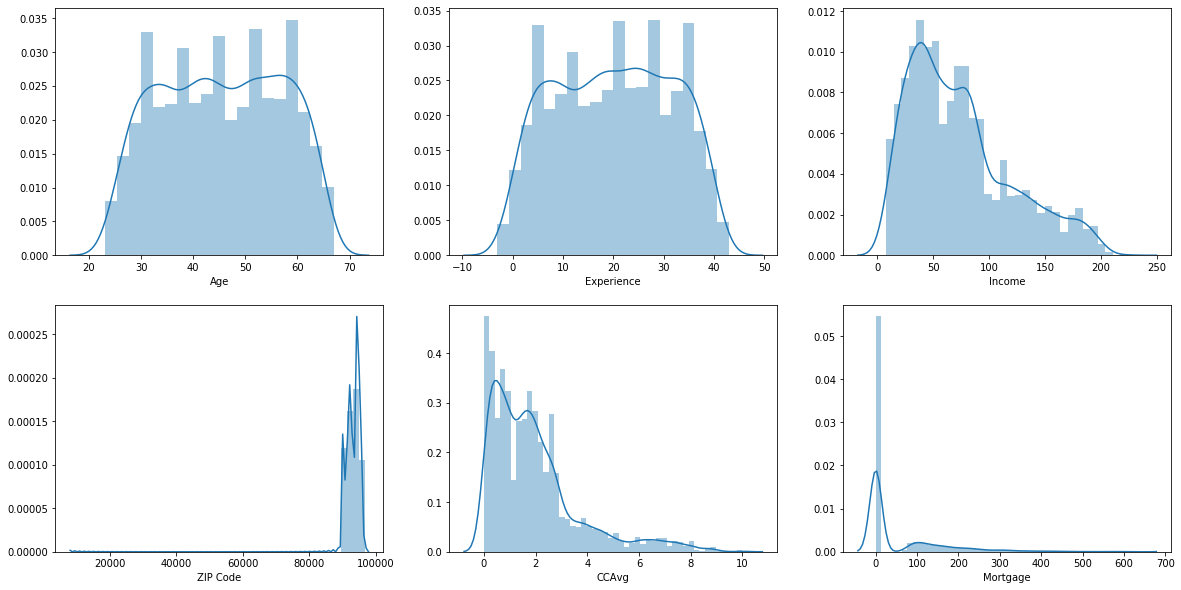

In [141]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(continous):
    ax=fig.add_subplot(2,3,i+1)
    sns.distplot(bank_df[col])

So Mortgage has maximum values as 0

ZIP Code is of some particular area.

Expirence and Age are uniformly distributed.

### Countplot

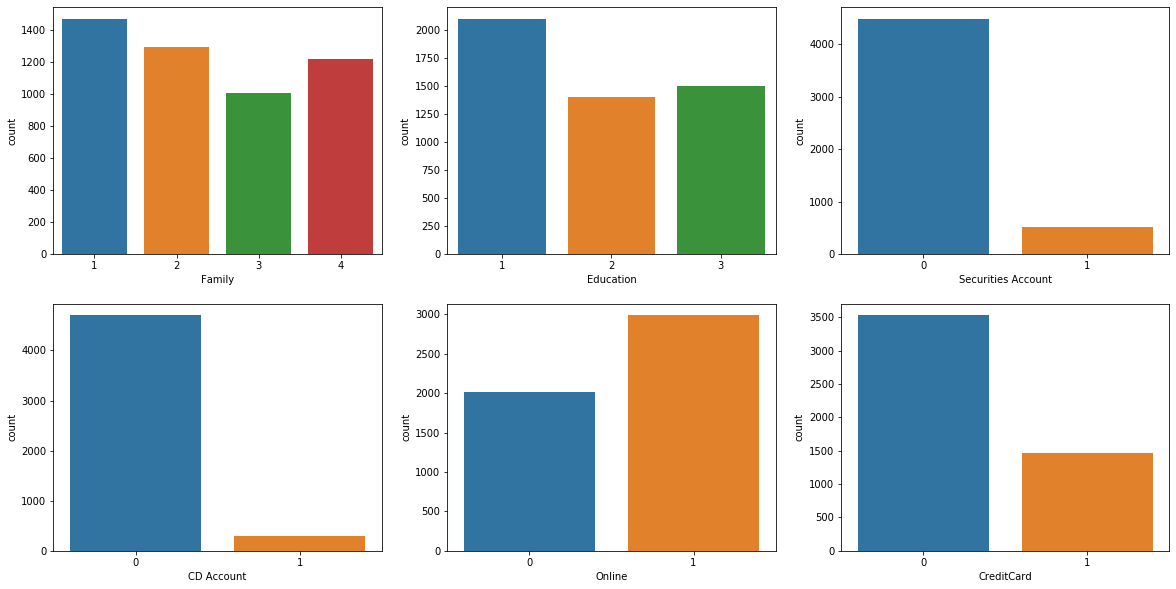

In [142]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical):
    ax=fig.add_subplot(2,3,i+1)
    sns.countplot(bank_df[col])

Most people are Ungrad

most people does not have securities account

most people does not have CD account

most people use Internet banking

most people does not have credit card

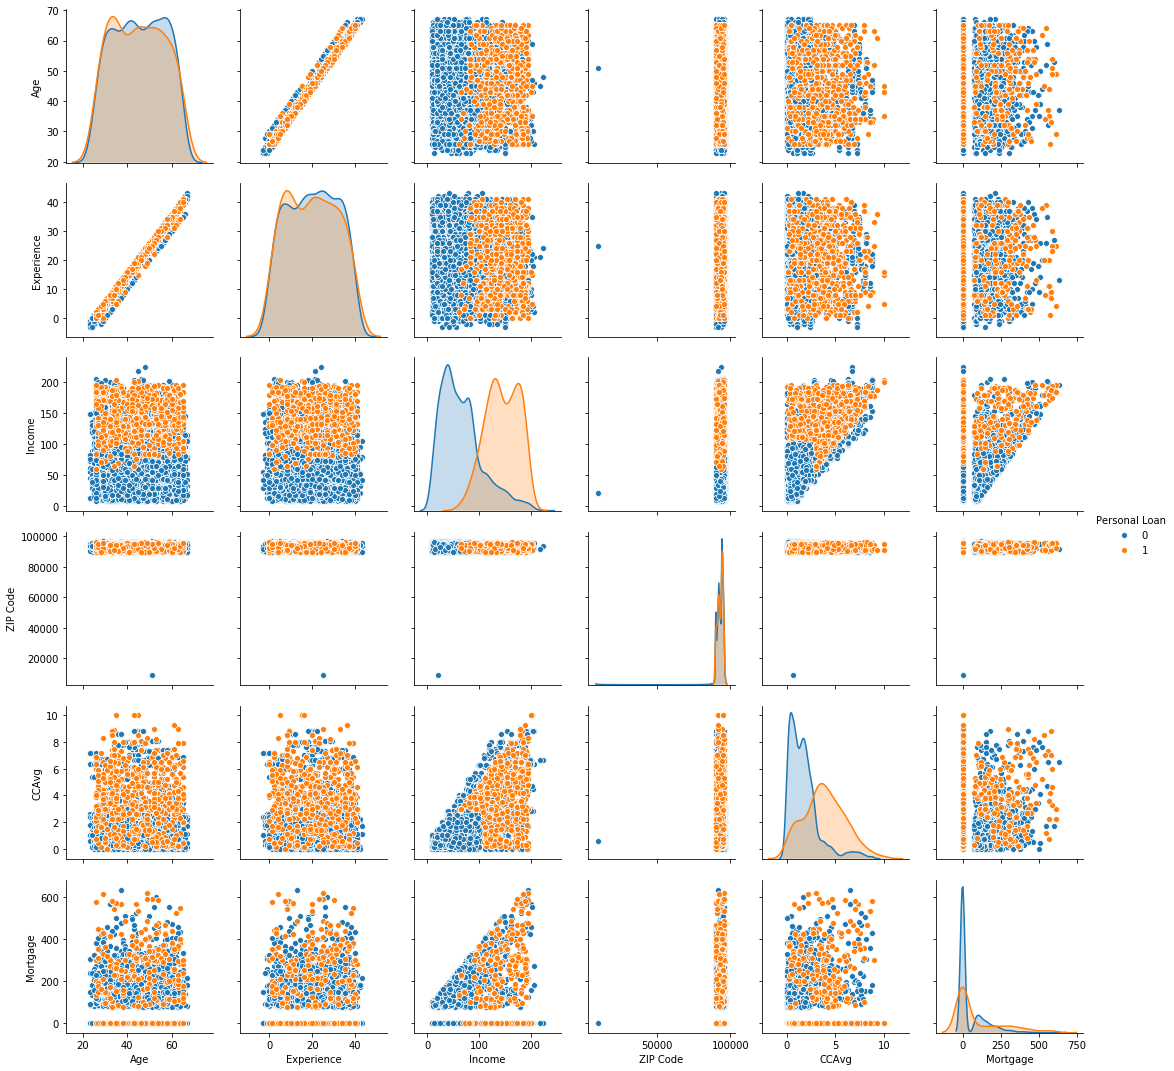

In [143]:
sns.pairplot(bank_df,
    x_vars=['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage'],
    y_vars=['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage'],
             diag_kind="kde",hue="Personal Loan")
plt.show()

# Data Cleaning

In [144]:
bank_df.drop_duplicates(inplace=True)

In [145]:
bank_df.shape

(5000, 14)

Means no duplicates

In [146]:
bank_df.set_index("ID",inplace=True)

In [147]:
bank_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [148]:
bank_df.drop("ZIP Code",axis=1,inplace=True)

(12.0, 0.0)

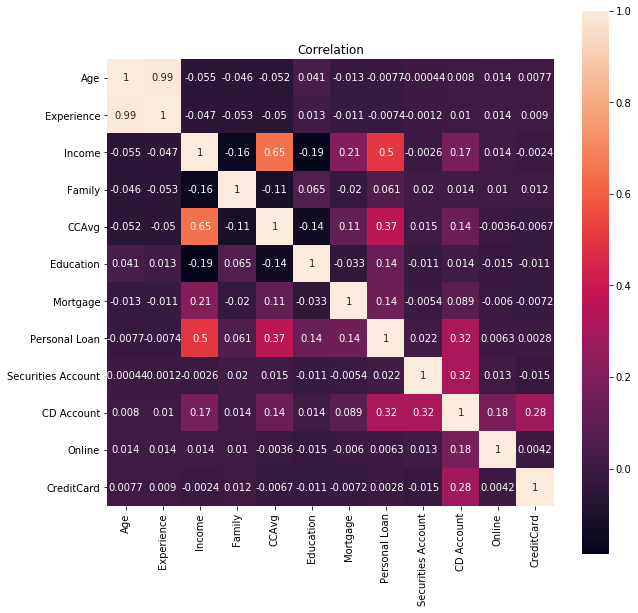

In [149]:
corr=bank_df.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation')
ax=sns.heatmap(corr, annot=True, square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

We will drop Experience

In [150]:
bank_df.drop('Experience',axis=1,inplace=True)

# Data Preparation

In [151]:
bank_df['Extra_serv']=bank_df['Online']+bank_df['CreditCard']

In [152]:
bank_df[['Extra_serv','Online','CreditCard','Personal Loan']].corr()

,Extra_serv,Online,CreditCard,Personal Loan
Extra_serv,1.000000,0.734052,0.682178,0.006493
Online,0.734052,1.000000,0.004210,0.006278
CreditCard,0.682178,0.004210,1.000000,0.002802
Personal Loan,0.006493,0.006278,0.002802,1.000000


In [153]:
bank_df.drop(['Online','CreditCard'],axis=1,inplace=True)

In [154]:
bank_df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Extra_serv
ID,,,,,,,,,,
1,25,49,4,1.6,1,0,0,1,0,0
2,45,34,3,1.5,1,0,0,1,0,0
3,39,11,1,1.0,1,0,0,0,0,0
4,35,100,1,2.7,2,0,0,0,0,0
5,35,45,4,1.0,2,0,0,0,0,1


# Train Test split

In [155]:
X = bank_df.drop('Personal Loan', axis=1)
y = bank_df['Personal Loan']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [157]:
X_train.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Extra_serv
ID,,,,,,,,,
4967,41,34,1,0.7,1,143,0,0,0
4087,50,11,4,0.2,1,0,1,0,0
2882,49,55,4,0.1,3,0,0,0,1
1238,38,169,1,6.8,3,0,0,1,2
1430,31,35,1,0.6,3,171,0,0,0


# Scaling

In [158]:
scaler=StandardScaler()

In [159]:
X_train[['Age','Income','Family','CCAvg','Education','Mortgage','Extra_serv']]=scaler.fit_transform(X_train[['Age','Income','Family','CCAvg','Education','Mortgage','Extra_serv']])
X_train.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Extra_serv
ID,,,,,,,,,
4967,-0.385787,-0.860819,-1.238309,-0.703082,-1.051445,0.876406,0,0,-1.34429
4087,0.403579,-1.363244,1.381527,-0.989418,-1.051445,-0.558751,1,0,-1.34429
2882,0.315871,-0.402083,1.381527,-1.046686,1.329698,-0.558751,0,0,0.14511
1238,-0.648908,2.088196,-1.238309,2.790225,1.329698,-0.558751,0,1,1.63451
1430,-1.262859,-0.838975,-1.238309,-0.760349,1.329698,1.157416,0,0,-1.34429


In [160]:
X_test[['Age','Income','Family','CCAvg','Education','Mortgage','Extra_serv']]=scaler.fit_transform(X_test[['Age','Income','Family','CCAvg','Education','Mortgage','Extra_serv']])
X_test.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Extra_serv
ID,,,,,,,,,
790,-1.396303,-0.936338,1.436208,-0.949392,0.147721,-0.549411,0,0,0.204340
2508,1.189762,-0.314001,1.436208,0.079016,-1.043579,1.651143,0,0,1.699507
2377,1.103560,-1.108017,0.567884,-1.006526,-1.043579,-0.549411,0,0,-1.290828
1379,0.758751,-0.871958,1.436208,-1.063660,1.339022,-0.549411,0,0,0.204340
599,0.931156,-1.365536,-0.300440,-1.006526,1.339022,0.296956,0,0,-1.290828


# Decision Tree Classifier

In [161]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [162]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [163]:
tree_score=f1_score(y_test,y_test_pred)
tree_score

0.9067524115755626

In [164]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

1.0


array([[3178,    0],
       [   0,  322]], dtype=int64)

In [165]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.9806666666666667


array([[1330,   12],
       [  17,  141]], dtype=int64)

In [166]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1342
           1       0.92      0.89      0.91       158

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



Thank You for Reading :)

Comments and Suggestions are welcome :)